# CPET models

In [107]:
import cv2
import pytesseract 
import matplotlib.pyplot as plt
import matplotlib.animation as anim
import matplotlib.animation
import numpy as np
import pandas as pd
import seaborn as sns
import math
from IPython.display import HTML
from scipy import stats
from scipy.signal import butter, lfilter
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix

In [108]:
data = pd.read_csv('DigitalDataEnriched_2.csv')
cardiac_lim_df = pd.read_csv('DigitalDataEnriched_2.csv')
cardiac_lim_df['sex'] = [0 if x == 'M' else 1 for x in cardiac_lim_df['sex']]

In [109]:
import statsmodels.api as sm

In [110]:
cardiac_lim_df.columns

Index(['Unnamed: 0', 'SessionId', 'PatientId', 'sex', 'age', 'BMI',
       'MaxVO2_EST', 'CardiacLim', 'PulmonaryLim', 'MuscleSkeletalLim',
       'PeakHeartRate', 'MeanHeartRate', 'MinHeartRate', 'StdHeartRate',
       'LowestVE/VCO2', 'PeakVE/VCO2', 'MeanVE/VCO2', 'StdVE/VCO2',
       'PeakVO2Real', 'DiffPeakVO2', 'MeanRER', 'PeakRER', 'LowestRER',
       'MeanVE', 'PeakVE', 'LowestVE', 'MeanRR', 'PeakRR', 'LowestRR',
       'MeanVO2', 'PeakVO2', 'LowestVO2', 'MeanVCO2', 'PeakVCO2', 'LowestVCO2',
       'HRvsVO2Slope', 'VEvsVCO2Slope', 'MeanO2Pulse', 'MaxO2Pulse',
       'MinO2Pulse', 'StdO2Pulse', '75VO2Slope', '75HRSlope', '75VCO2Slope',
       '75VESlope', '75RERSlope', '75RRSlope', '75O2Slope', 'VO2atVT',
       'VO2vsPeakVO2atVT', 'HasAnaerobicThresholdMean'],
      dtype='object')

C:\Users\julio\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\julio\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='VEvsVCO2Slope', ylabel='Density'>

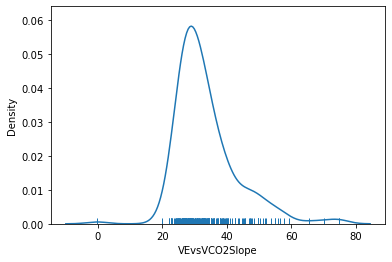

In [111]:
sns.distplot(data.VEvsVCO2Slope, rug=True, hist=False)

C:\Users\julio\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\julio\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


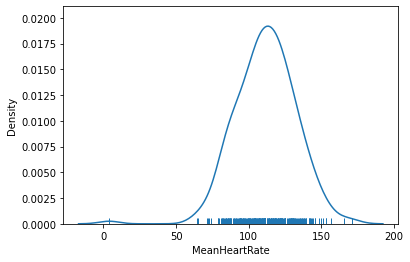

In [112]:
ax = sns.distplot(data.MeanHeartRate, rug=True, hist=False)

C:\Users\julio\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\julio\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


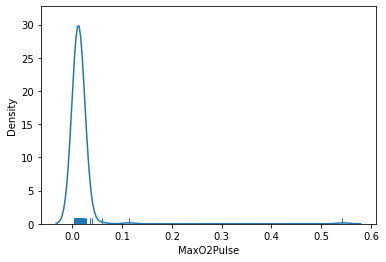

In [113]:
ax = sns.distplot(data.MaxO2Pulse, rug=True, hist=False)

C:\Users\julio\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\julio\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


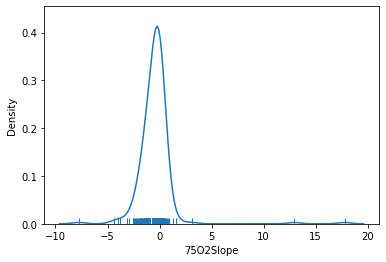

In [114]:
ax = sns.distplot(data['75O2Slope'], rug=True, hist=False)

In [115]:
def plot_logistics_no_model(x_values_train,y_values_test, x_val, y_val, y_pred, title="Training"):
    yhat = y_pred
    # retrieve just the probabilities for the positive class
    pos_probs = y_pred
    # plot no skill roc curve
    plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
    # calculate roc curve for model
    fpr, tpr, _ = roc_curve(y_val, y_pred)
    auc = roc_auc_score(y_val, y_pred, multi_class='ovr')
    # plot model roc curve
    plt.plot(fpr, tpr, marker='.', label='Model')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    plt.title("{} ROC curve with AUC={:.2f}".format(title, auc))
    # show the plot
    plt.show()
    pass

In [334]:
cardiac_lim_df = cardiac_lim_df[['CardiacLim', 'BMI',
       'MaxVO2_EST','PeakHeartRate', 'MeanHeartRate', 'MinHeartRate',
       'LowestVE/VCO2', 'PeakVE/VCO2', 'MeanVE/VCO2', 'StdVE/VCO2',
       'PeakVO2Real', 'DiffPeakVO2', 'MeanRER', 'PeakRER', 'LowestRER',
       'MeanVE', 'PeakVE', 'LowestVE', 'MeanRR', 'PeakRR', 'LowestRR',
       'MeanVO2', 'PeakVO2', 'LowestVO2', 'MeanVCO2', 'PeakVCO2', 'LowestVCO2',
       'HRvsVO2Slope', 'VEvsVCO2Slope', 'MeanO2Pulse', 'MaxO2Pulse',
       'MinO2Pulse', 'StdO2Pulse', '75VO2Slope', '75HRSlope', '75VCO2Slope',
       '75VESlope', '75RERSlope', '75RRSlope', '75O2Slope', 'VO2atVT',
       'VO2vsPeakVO2atVT', 'HasAnaerobicThresholdMean']]

In [335]:
data_df = cardiac_lim_df.copy()
y = data_df['CardiacLim']
X = data_df.drop('CardiacLim', axis=1)

In [336]:
(cardiac_lim_df.PeakVO2-np.mean(cardiac_lim_df.PeakVO2))/np.std(cardiac_lim_df.PeakVO2)

0     -0.080027
1     -0.124741
2      0.250504
3      0.497428
4      0.230867
         ...   
222   -0.155893
223   -0.234158
224   -0.133342
225   -0.300273
226   -0.235722
Name: PeakVO2, Length: 227, dtype: float64

In [337]:
cardiac_lim_df = pd.read_csv('DigitalDataEnriched_2.csv')
data_df = cardiac_lim_df.copy()
X = data_df
X = X.drop('SessionId', axis=1)
X = X.drop('PatientId', axis=1)
X = X.drop('CardiacLim', axis=1)
X = X.drop('PulmonaryLim', axis=1)
X = X.drop('MuscleSkeletalLim', axis=1)
X = X.drop('Unnamed: 0', axis=1)
X = X.drop('sex', axis=1)
X = X.drop('age', axis=1)
X = X.drop('BMI', axis=1)
X = X.drop('HasAnaerobicThresholdMean', axis=1)
#X = X[['VEvsVCO2Slope','MeanHeartRate','MaxO2Pulse','75O2Slope','LowestVO2','PeakHeartRate','MeanRER','PeakRER','LowestRER','LowestVE','MeanRR','LowestRR','LowestVE/VCO2']]

#X = X[['MeanVO2','LowestVO2','PeakRER','LowestRER','LowestVE/VCO2','PeakVE/VCO2','MinO2Pulse','75HRSlope']]

#X = X[['VEvsVCO2Slope','MeanHeartRate','75O2Slope','LowestVO2','PeakHeartRate','MeanRER','PeakRER','LowestRER','LowestVE','MeanRR','LowestRR','LowestVE/VCO2']]
#X = X[['MeanHeartRate','LowestVO2','PeakHeartRate','PeakRER','LowestRER','75VO2Slope','LowestVE/VCO2']]
y = data_df['CardiacLim']

In [338]:
X.columns

Index(['MaxVO2_EST', 'PeakHeartRate', 'MeanHeartRate', 'MinHeartRate',
       'StdHeartRate', 'LowestVE/VCO2', 'PeakVE/VCO2', 'MeanVE/VCO2',
       'StdVE/VCO2', 'PeakVO2Real', 'DiffPeakVO2', 'MeanRER', 'PeakRER',
       'LowestRER', 'MeanVE', 'PeakVE', 'LowestVE', 'MeanRR', 'PeakRR',
       'LowestRR', 'MeanVO2', 'PeakVO2', 'LowestVO2', 'MeanVCO2', 'PeakVCO2',
       'LowestVCO2', 'HRvsVO2Slope', 'VEvsVCO2Slope', 'MeanO2Pulse',
       'MaxO2Pulse', 'MinO2Pulse', 'StdO2Pulse', '75VO2Slope', '75HRSlope',
       '75VCO2Slope', '75VESlope', '75RERSlope', '75RRSlope', '75O2Slope',
       'VO2atVT', 'VO2vsPeakVO2atVT'],
      dtype='object')

In [339]:
age_df = data_df[['PatientId','age']]
age_df.drop_duplicates()
np.mean(age_df.age.values)
np.std(age_df.age.values)

14.98979321145012

In [340]:
X_normalized = (X-X.mean())/X.std()

In [341]:
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.25, random_state=42
)

In [342]:
from imblearn.over_sampling import SMOTE
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

C:\Users\julio\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [343]:
X.columns

Index(['MaxVO2_EST', 'PeakHeartRate', 'MeanHeartRate', 'MinHeartRate',
       'StdHeartRate', 'LowestVE/VCO2', 'PeakVE/VCO2', 'MeanVE/VCO2',
       'StdVE/VCO2', 'PeakVO2Real', 'DiffPeakVO2', 'MeanRER', 'PeakRER',
       'LowestRER', 'MeanVE', 'PeakVE', 'LowestVE', 'MeanRR', 'PeakRR',
       'LowestRR', 'MeanVO2', 'PeakVO2', 'LowestVO2', 'MeanVCO2', 'PeakVCO2',
       'LowestVCO2', 'HRvsVO2Slope', 'VEvsVCO2Slope', 'MeanO2Pulse',
       'MaxO2Pulse', 'MinO2Pulse', 'StdO2Pulse', '75VO2Slope', '75HRSlope',
       '75VCO2Slope', '75VESlope', '75RERSlope', '75RRSlope', '75O2Slope',
       'VO2atVT', 'VO2vsPeakVO2atVT'],
      dtype='object')

### Using Random forest 

[0.         0.21621622 1.        ]
[0.  0.6 1. ]
0.8324324324324324
[0.01021248 0.00729756 0.01319689 0.01205521 0.01085573 0.01476426
 0.01681624 0.02224263 0.02045691 0.02414656 0.10055387 0.02250643
 0.01138212 0.0223385  0.00935291 0.01370163 0.02071234 0.01840691
 0.01410836 0.01296544 0.02961221 0.02954999 0.02143669 0.02064248
 0.02020517 0.02988689 0.00898724 0.01820733 0.01510824 0.0075472
 0.02261248 0.01831814 0.1024551  0.04032306 0.04112088 0.03044209
 0.02879389 0.045383   0.03793504 0.01332953 0.02003037]
[0.1024551  0.10055387 0.045383   0.04112088 0.04032306 0.03793504
 0.03044209 0.02988689 0.02961221 0.02954999 0.02879389 0.02414656
 0.02261248 0.02250643 0.0223385  0.02224263 0.02143669 0.02071234
 0.02064248 0.02045691 0.02020517 0.02003037 0.01840691 0.01831814
 0.01820733 0.01681624 0.01510824 0.01476426 0.01410836 0.01370163
 0.01332953 0.01319689 0.01296544 0.01205521 0.01138212 0.01085573
 0.01021248 0.00935291 0.00898724 0.0075472  0.00729756]
[32 10 37 34 33

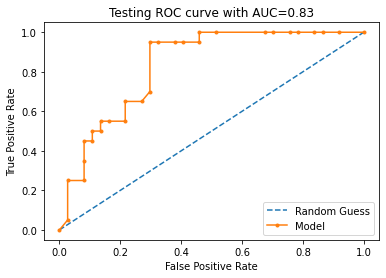

0.7192982456140351

In [348]:
from sklearn.ensemble import RandomForestClassifier
#clf = RandomForestClassifier(max_depth=2, random_state=0, class_weight={0:4,1:5})
clf = RandomForestClassifier(random_state=0, class_weight={0:1,1:6}, max_depth=100)
#clf.fit(X_train_SMOTE, y_train_SMOTE)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
fpr, tpr, _ = roc_curve(y_test, clf.predict(X_test))
print(fpr)
print(tpr)

auc = roc_auc_score(y_test,  clf.predict_proba(X_test)[:,1], multi_class='ovr')
print(auc)
importances = clf.feature_importances_
print(importances)
print(-np.sort(-importances))
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
print(sorted_indices)
print(X_train.columns[sorted_indices])
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, clf.predict(X_test)).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
positive_predictive_value = tp / (tp+fp)
print(f'Specificity {specificity}')
print(f'Sensitivity {sensitivity}')
print(f'Positive Predictive Value {positive_predictive_value}')
print(confusion_matrix(y_test, clf.predict(X_test)))
plot_logistics_no_model(X_train_SMOTE, y_train_SMOTE,X_test, y_test,clf.predict_proba(X_test)[:,1],"Testing")
accuracy_score(y_test, clf.predict(X_test))

In [377]:
X_train.values.ravel().shape

(6970,)

In [378]:

from boruta import BorutaPy
clf = RandomForestClassifier(n_jobs=-1, class_weight={0:1,1:6}, max_depth=100)
# define Boruta feature selection method
feat_selector = BorutaPy(clf, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features
feat_selector.fit(X_train.values, y_train.values.ravel())

# check selected features
feat_selector.support_

# check ranking of features
feat_selector.ranking_

# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X_train.values)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	41
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	41
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	41
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	41
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	41
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	41
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	41
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	10
Iteration: 	9 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	10
Iteration: 	10 / 100
Confirmed: 	1
Tentative: 	30
Rejected: 	10
Iteration: 	11 / 100
Confirmed: 	1
Tentative: 	30
Rejected: 	10
Iteration: 	12 / 100
Confirmed: 	1
Tentative: 	20
Rejected: 	20
Iteration: 	13 / 100
Confirmed: 	1
Tentative: 	20
Rejected: 	20
Iteration: 	14 / 100
Confirmed: 	1
Tentative: 	20
Rejected: 	20
Iteration: 	15 / 100
Confirmed: 	1
Tentative: 	20
Rejected: 	20
Iteration: 	16 / 100
Confirmed: 	1
Tentative: 	15
Reject

In [379]:
feat_selector.support_

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False])

In [382]:
feat_selector.ranking_

array([37, 35, 26, 34, 27, 13, 32,  2, 15, 33,  1,  5, 30, 23, 17, 20, 14,
       28, 25, 17, 22, 18,  7, 11, 38,  5, 25, 32, 30, 36, 22, 20,  1,  2,
        2,  2, 10,  5,  9, 12,  9])

In [373]:
X_train.columns[feat_selector.support_]

Index(['DiffPeakVO2', '75VO2Slope'], dtype='object')

In [371]:
X_train.columns[feat_selector.ranking_[-9:]]

Index(['PeakHeartRate', 'MeanHeartRate', 'MeanHeartRate', 'MeanHeartRate',
       'DiffPeakVO2', 'LowestVE/VCO2', 'PeakVO2Real', 'PeakRER',
       'PeakVO2Real'],
      dtype='object')

In [357]:
X_filtered

array([[ 1.07072700e-01, -8.92619895e-02],
       [-4.98235245e-02,  4.65515328e-01],
       [-5.77768364e-02, -3.03460030e-01],
       [-1.40344288e-01,  4.92199820e-01],
       [-5.55769521e-02,  2.39311362e-01],
       [-4.81405477e-01,  1.14257617e+00],
       [ 1.66814565e-01, -1.64517244e-01],
       [-2.73922093e-02,  4.14781138e-01],
       [ 2.09301961e-01, -4.90878529e-02],
       [-2.85242807e-02, -1.33278765e+00],
       [ 1.10158342e-01,  3.12991863e-01],
       [-4.69317965e-01, -2.79636824e+00],
       [ 6.55365725e-02,  2.40467416e-01],
       [ 1.67404974e-02, -6.07325436e-01],
       [ 1.14074965e-01, -2.50723059e-01],
       [ 2.48035133e-01, -2.93105482e-02],
       [-4.55598335e-01, -1.78314360e-01],
       [ 1.02640496e-01, -4.83510149e-01],
       [-2.18133022e-01,  7.30009488e-01],
       [ 2.03334054e-01, -2.47523117e-02],
       [-7.26421312e-03,  8.27038638e-01],
       [ 1.62956293e-02,  4.32699348e-01],
       [ 4.63121958e-01, -3.98488843e-01],
       [-1.

In [391]:
clf = LogisticRegression(random_state=0, penalty='l1', solver='liblinear').fit(X_train, y_train)
print(clf.coef_)
y_test_pred = clf.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, np.round(y_test_pred)).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
positive_predictive_value = tp / (tp+fp)
print(f'Specificity {specificity}')
print(f'Sensitivity {sensitivity}')
print(f'Positive Predictive Value {positive_predictive_value}')
print(confusion_matrix(y_test, np.round(y_test_pred)))
auc = roc_auc_score(y_test, y_test_pred, multi_class='ovr')
print(f'AUC: {auc}')
accuracy = accuracy_score(y_test, np.round(y_test_pred))
print(f'Accuracy: {accuracy}')

[[ 0.19787543  0.          0.          0.         -0.69158121  0.
   0.          0.          0.          0.          0.          0.12770238
   0.23956007  0.07582176  0.12347394  0.          0.          0.03417431
  -0.28507796 -0.02626237  0.          0.          0.          0.
   0.          0.          0.55763378 -0.06918636  0.          0.
   0.         -0.36473892  0.         -0.40961869  0.18310405 -0.43616156
   0.20449353  0.          0.         -1.33715136  1.04343176]]
Specificity 0.8378378378378378
Sensitivity 0.75
Positive Predictive Value 0.7142857142857143
[[31  6]
 [ 5 15]]
AUC: 0.793918918918919
Accuracy: 0.8070175438596491


In [392]:
X_train.columns[np.where(clf.coef_!= 0)[1]]

Index(['MaxVO2_EST', 'StdHeartRate', 'MeanRER', 'PeakRER', 'LowestRER',
       'MeanVE', 'MeanRR', 'PeakRR', 'LowestRR', 'HRvsVO2Slope',
       'VEvsVCO2Slope', 'StdO2Pulse', '75HRSlope', '75VCO2Slope', '75VESlope',
       '75RERSlope', 'VO2atVT', 'VO2vsPeakVO2atVT'],
      dtype='object')

In [309]:

sorted_indices = np.argsort(-clf.coef_)[::-1]
print(sorted_indices)
-np.sort(-clf.coef_)
print(clf.coef_[0,sorted_indices])
print(np.where(clf.coef_[0,sorted_indices]==0)[1])
print(sorted_indices.flatten()[np.where(clf.coef_[0,sorted_indices]==0)[1].flatten()])
excluded_columns = sorted_indices.flatten()[np.where(clf.coef_[0,sorted_indices]==0)[1].flatten()]
included_columns = sorted_indices.flatten()[np.where(clf.coef_[0,sorted_indices]!=0)[1].flatten()]
print(included_columns)
X.columns[-excluded_columns]
X_train_regularized = X.columns[-excluded_columns]
X_train_reg = X_train.loc[:,X_train_regularized]
X.columns[included_columns]

[[40 26 12 36  0 34 11 14 13 17 25  2 28 29  5 30 32  1 37 38 24 23 22 21
   6  7  8  9 10  3 20 16 15 19 27 18 31 33 35  4 39]]
[[ 1.04343176  0.55763378  0.23956007  0.20449353  0.19787543  0.18310405
   0.12770238  0.12347394  0.07582176  0.03417431  0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.         -0.02626237 -0.06918636 -0.28507796
  -0.36473892 -0.40961869 -0.43616156 -0.69158121 -1.33715136]]
[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32]
[25  2 28 29  5 30 32  1 37 38 24 23 22 21  6  7  8  9 10  3 20 16 15]
[40 26 12 36  0 34 11 14 13 17 19 27 18 31 33 35  4 39]


Index(['VO2vsPeakVO2atVT', 'HRvsVO2Slope', 'PeakRER', '75RERSlope',
       'MaxVO2_EST', '75VCO2Slope', 'MeanRER', 'MeanVE', 'LowestRER', 'MeanRR',
       'LowestRR', 'VEvsVCO2Slope', 'PeakRR', 'StdO2Pulse', '75HRSlope',
       '75VESlope', 'StdHeartRate', 'VO2atVT'],
      dtype='object')

In [284]:
X_train_reg['HasAnaerobicThresholdMean']

38     0.202738
24     0.202738
66     0.202738
184    0.202738
195    0.202738
         ...   
106    0.202738
14     0.202738
92     0.202738
179    0.202738
102    0.202738
Name: HasAnaerobicThresholdMean, Length: 170, dtype: float64

In [254]:
X_train_reg = X_train.loc[:,X_train_regularized]
X_test_Reg = X_test.loc[:,X_train_regularized]

In [281]:
#model = sm.GLM(y_train_SMOTE,X_train_SMOTE, sm.families.Binomial())
#model = sm.GLM(y_train,sm.add_constant(X_train_reg), sm.families.Binomial())
model = sm.GLM(y_train,sm.add_constant(X_train_reg), sm.families.Binomial())
#result_stat_model = model.fit_regularized()
#results_fr_fit = sm.regression.linear_model.OLSResults(model,result_stat_model.params)
#print(result_stat_model.params)
result_stat_model = model.fit()
result_stat_model.summary()

C:\Users\julio\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\julio\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: divide by zero encountered in log
  y * np.log(mu / (1 - mu + 1e-20)) +
C:\Users\julio\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: invalid value encountered in multiply
  y * np.log(mu / (1 - mu + 1e-20)) +


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             CardiacLim   No. Observations:                  170
Model:                            GLM   Df Residuals:                      150
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 02 Jun 2021   Deviance:                       135.15
Time:                        07:33:13   Pearson chi2:                     141.
No. Iterations:                    34                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -1.415e+04   9.42e+05     -0.015      0.988   -1.86e+06    1.83e+06
75RRSlope                     0.4786      0.554      0.865      0.387      -0.606       1.564
StdHeartRate                 -0.4114      0.499     -0.824      0.410      -1.390       0.567
DiffPeakVO2                   3.1836      2.377      1.339      0.180      -1.475       7.843
PeakRER                       0.3126      1.037      0.301      0.763      -1.720       2.345
LowestRER                     0.3124      1.037      0.301      0.763      -1.720       2.345
MeanVE                        1.7251      1.119      1.541      0.123      -0.469       3.919
HasAnaerobicThresholdMean  6.972e+04   4.96e+06      0.014      0.989   -9.65e+06    9.79e+06
MeanRR                       -0.4234      0.541     -0.783      0.434      -1.483       0.636
PeakRR                        0.0423      5.572      0.008      0.994     -10.879      10.964
MeanVO2                      -0.8768      8.766     -0.100      0.920     -18.058      16.304
LowestRR                      0.0428      5.572      0.008      0.994     -10.879      10.964
LowestVO2                 -1.824e+05   3.72e+09   -4.9e-05      1.000   -7.29e+09    7.29e+09
75RERSlope                    0.3309      0.507      0.653      0.514      -0.663       1.325
75VESlope                    -2.5286      1.361     -1.858      0.063      -5.196       0.138
75VCO2Slope                   1.9101      2.315      0.825      0.409      -2.628       6.448
HRvsVO2Slope                  0.4175      0.426      0.979      0.328      -0.418       1.253
VEvsVCO2Slope                -0.9587      0.575     -1.668      0.095      -2.085       0.168
VO2atVT                      -0.3740      0.337     -1.110      0.267      -1.034       0.286
75VO2Slope                    0.2581      3.417      0.076      0.940      -6.440       6.956
PeakVO2                    1.824e+05   3.72e+09    4.9e-05      1.000   -7.29e+09    7.29e+09
75HRSlope                    -0.6336      0.422     -1.501      0.133      -1.461       0.193
=============================================================================================
"""

In [252]:
print(['MeanVO2','LowestVO2','PeakRER','LowestRER','LowestVE/VCO2','PeakVE/VCO2','MinO2Pulse','75HRSlope'])

['MeanVO2', 'LowestVO2', 'PeakRER', 'LowestRER', 'LowestVE/VCO2', 'PeakVE/VCO2', 'MinO2Pulse', '75HRSlope']


In [255]:
#Sensitivity, specifity
from sklearn.metrics import confusion_matrix
y_test_pred = result_stat_model.predict(X_test_Reg)
tn, fp, fn, tp = confusion_matrix(y_test, np.round(y_test_pred)).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
positive_predictive_value = tp / (tp+fp)
print(f'Specificity {specificity}')
print(f'Sensitivity {sensitivity}')
print(f'Positive Predictive Value {positive_predictive_value}')
print(confusion_matrix(y_test, np.round(y_test_pred)))
accuracy_score(y_test, np.round(y_test_pred))

Specificity 0.5405405405405406
Sensitivity 0.9
Positive Predictive Value 0.5142857142857142
[[20 17]
 [ 2 18]]


0.6666666666666666

In [171]:
print(f'tp:{tp}')
print(f'fp:{fp}')
print(f'fn:{fn}')
print(f'tn:{tn}')

tp:12
fp:11
fn:8
tn:26


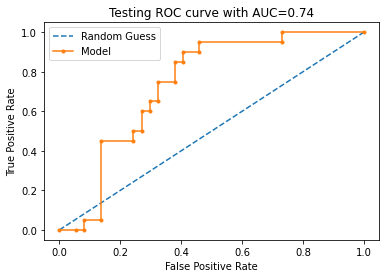

In [160]:
y_test_pred = result_stat_model.predict(X_test)
plot_logistics_no_model(X_train_SMOTE, y_train_SMOTE,X_test, y_test,y_test_pred,"Testing")

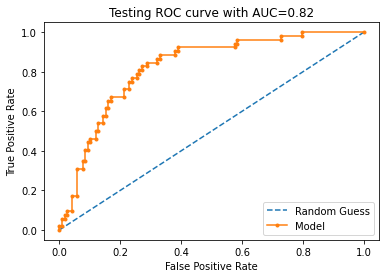

In [161]:
y_train_pred = result_stat_model.predict(X_train)
plot_logistics_no_model(X_train_SMOTE, y_train_SMOTE,X_test, y_train,y_train_pred,"Testing")


In [162]:
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred)
#auc_precision_recall = auc(recall, precision)
#print(auc_precision_recall)

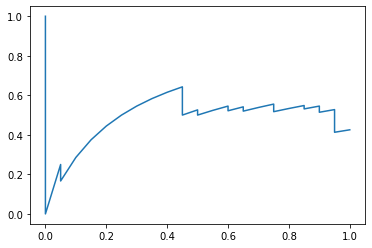

In [163]:
plt.plot(recall, precision)
plt.show()

0.8226857887874838


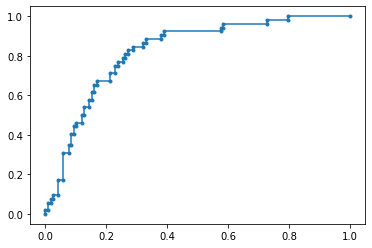

In [164]:
fpr, tpr, _ = roc_curve(y_train, result_stat_model.predict(X_train))
auc = roc_auc_score(y_train,  result_stat_model.predict(X_train), multi_class='ovr')
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='Logistic')
print(auc)

In [165]:
accuracy_score(y_test, np.round(y_test_pred))

0.6666666666666666

In [167]:
confusion_matrix(y_test, np.round(y_test_pred))

array([[26, 11],
       [ 8, 12]], dtype=int64)

In [169]:
26/(26+11)

0.7027027027027027

In [136]:
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred)
auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)

TypeError: 'numpy.float64' object is not callable

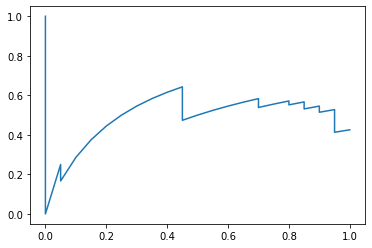

In [137]:
plt.plot(recall, precision)
plt.show()

In [138]:
y_train

38     1
24     0
66     0
184    0
195    0
      ..
106    1
14     0
92     1
179    1
102    1
Name: CardiacLim, Length: 170, dtype: int64

In [139]:
model.predict(X_train)

ValueError: shapes (236,8) and (170,8) not aligned: 8 (dim 1) != 170 (dim 0)

In [24]:
fpr, tpr, _ = roc_curve(y_train, model.predict(X_train))
auc = roc_auc_score(y_train,  model.predict(X_train), multi_class='ovr')
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='Logistic')
print(auc)

ValueError: shapes (236,17) and (170,17) not aligned: 17 (dim 1) != 170 (dim 0)

# Pulmonary Model

In [393]:
data.columns

Index(['Unnamed: 0', 'SessionId', 'PatientId', 'sex', 'age', 'BMI',
       'MaxVO2_EST', 'CardiacLim', 'PulmonaryLim', 'MuscleSkeletalLim',
       'PeakHeartRate', 'MeanHeartRate', 'MinHeartRate', 'StdHeartRate',
       'LowestVE/VCO2', 'PeakVE/VCO2', 'MeanVE/VCO2', 'StdVE/VCO2',
       'PeakVO2Real', 'DiffPeakVO2', 'MeanRER', 'PeakRER', 'LowestRER',
       'MeanVE', 'PeakVE', 'LowestVE', 'MeanRR', 'PeakRR', 'LowestRR',
       'MeanVO2', 'PeakVO2', 'LowestVO2', 'MeanVCO2', 'PeakVCO2', 'LowestVCO2',
       'HRvsVO2Slope', 'VEvsVCO2Slope', 'MeanO2Pulse', 'MaxO2Pulse',
       'MinO2Pulse', 'StdO2Pulse', '75VO2Slope', '75HRSlope', '75VCO2Slope',
       '75VESlope', '75RERSlope', '75RRSlope', '75O2Slope', 'VO2atVT',
       'VO2vsPeakVO2atVT', 'HasAnaerobicThresholdMean'],
      dtype='object')

In [394]:
pulmonary_lim_df = data.copy()
pulmonary_lim_df['sex'] = [0 if x == 'M' else 1 for x in pulmonary_lim_df['sex']]
X = pulmonary_lim_df
X = X.drop('SessionId', axis=1)
X = X.drop('PatientId', axis=1)
X = X.drop('CardiacLim', axis=1)
X = X.drop('PulmonaryLim', axis=1)
X = X.drop('MuscleSkeletalLim', axis=1)
X = X.drop('Unnamed: 0', axis=1)
X = X.drop('sex', axis=1)
X = X.drop('age', axis=1)
X = X.drop('BMI', axis=1)
X = X.drop('HasAnaerobicThresholdMean', axis=1)
#X = X[['VEvsVCO2Slope','MeanO2Pulse','MaxO2Pulse','MinO2Pulse','MeanVO2','LowestVO2','MeanVE','MeanRR','VO2atVT','VO2vsPeakVO2atVT','75VO2Slope']]
#X = X[['VEvsVCO2Slope','MeanO2Pulse','MaxO2Pulse','MinO2Pulse','MeanVO2','LowestVO2','MeanVE','MeanRR','VO2atVT','VO2vsPeakVO2atVT','75VO2Slope', ]]
#X = X[['VEvsVCO2Slope','MeanO2Pulse','MaxO2Pulse','MinO2Pulse','MeanVO2','LowestVO2','MeanVE','MeanRR','PeakVO2Real']]
#Latest useful
#X = X[['VEvsVCO2Slope','MeanO2Pulse','MinO2Pulse','LowestVO2','MeanVE','PeakVO2Real','75VO2Slope']]


###X = X[['MeanO2Pulse','MinO2Pulse','LowestVO2','PeakVO2Real','VEvsVCO2Slope','MeanVE','75VO2Slope']]


#X = X[['VEvsVCO2Slope','MeanO2Pulse','MinO2Pulse','LowestVO2','MeanVE','PeakVO2Real','75VO2Slope',
#       'MeanVO2','PeakRER','LowestRER','LowestVE/VCO2','PeakVE/VCO2','75HRSlope']]
y = pulmonary_lim_df['PulmonaryLim']

In [395]:
X_normalized = (X-X.mean())/X.std()

In [396]:
X.std()

MaxVO2_EST             0.613316
PeakHeartRate         29.848044
MeanHeartRate         20.715421
MinHeartRate          29.848044
StdHeartRate           9.234584
LowestVE/VCO2       1442.713494
PeakVE/VCO2         1442.713494
MeanVE/VCO2           61.944103
StdVE/VCO2           285.636163
PeakVO2Real            4.511728
DiffPeakVO2            4.478354
MeanRER                0.077270
PeakRER                0.228957
LowestRER              0.228957
MeanVE                13.044434
PeakVE                33.915883
LowestVE              33.915883
MeanRR                 7.623903
PeakRR                12.113736
LowestRR              12.113736
MeanVO2                2.877411
PeakVO2                4.511828
LowestVO2              4.511728
MeanVCO2               2.225486
PeakVCO2               2.605438
LowestVCO2             2.605438
HRvsVO2Slope          27.447482
VEvsVCO2Slope          9.650722
MeanO2Pulse            0.027487
MaxO2Pulse             0.036235
MinO2Pulse             0.014078
StdO2Pul

In [397]:
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.25, random_state=42
)

In [398]:
from imblearn.over_sampling import SMOTE
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

C:\Users\julio\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### Using Random forest 

[0.         0.02777778 1.        ]
[0.         0.33333333 1.        ]
0.7936507936507936
[0.01330779 0.01699942 0.02312609 0.01536873 0.01795933 0.01619009
 0.01097952 0.05259553 0.01833225 0.00657393 0.01473302 0.01884631
 0.01536776 0.02051483 0.02102485 0.02863534 0.02500431 0.02697318
 0.02955398 0.02078704 0.02836459 0.02631048 0.01293773 0.01898181
 0.01075793 0.00990248 0.02355147 0.08136723 0.03985902 0.03085099
 0.0246811  0.00933733 0.04593072 0.0238048  0.04471782 0.02549727
 0.02225937 0.03642328 0.03683649 0.01122498 0.02352979]
[27  7 32 34 28 38 37 29 18 15 20 17 21 35 16 30 33 26 40  2 36 14 19 13
 23 11  8  4  1  5  3 12 10  0 22 39  6 24 25 31  9]
Index(['VEvsVCO2Slope', 'MeanVE/VCO2', '75VO2Slope', '75VCO2Slope',
       'MeanO2Pulse', '75O2Slope', '75RRSlope', 'MaxO2Pulse', 'PeakRR',
       'PeakVE', 'MeanVO2', 'MeanRR', 'PeakVO2', '75VESlope', 'LowestVE',
       'MinO2Pulse', '75HRSlope', 'HRvsVO2Slope', 'VO2vsPeakVO2atVT',
       'MeanHeartRate', '75RERSlope', 'Mea

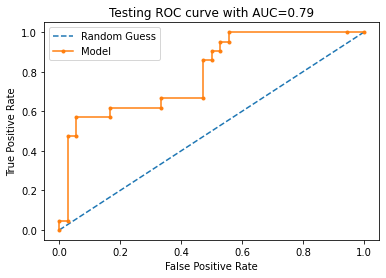

In [399]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=6, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
fpr, tpr, _ = roc_curve(y_test, clf.predict(X_test))
print(fpr)
print(tpr)
auc = roc_auc_score(y_test,  clf.predict_proba(X_test)[:,1], multi_class='ovr')
print(auc)
importances = clf.feature_importances_
print(importances)
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
print(sorted_indices)
print(X_train.columns[sorted_indices])
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, clf.predict(X_test)).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
positive_predictive_value = tp / (tp+fp)
print(f'Specificity {specificity}')
print(f'Sensitivity {sensitivity}')
print(f'Positive Predictive Value {positive_predictive_value}')
print(confusion_matrix(y_test, clf.predict(X_test)))
accuracy = accuracy_score(y_test, np.round(y_test_pred))
print(f'Accuracy: {accuracy}')
plot_logistics_no_model(X_train_SMOTE, y_train_SMOTE,X_test, y_test,clf.predict_proba(X_test)[:,1],"Testing")

In [402]:
(7+35)/(36+14+7)

0.7368421052631579

In [400]:
clf = LogisticRegression(random_state=0, penalty='l1', solver='liblinear').fit(X_train, y_train)
print(clf.coef_)
y_test_pred = clf.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, np.round(y_test_pred)).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
positive_predictive_value = tp / (tp+fp)
print(f'Specificity {specificity}')
print(f'Sensitivity {sensitivity}')
print(f'Positive Predictive Value {positive_predictive_value}')
print(confusion_matrix(y_test, np.round(y_test_pred)))
auc = roc_auc_score(y_test, y_test_pred, multi_class='ovr')
print(f'AUC: {auc}')
accuracy = accuracy_score(y_test, np.round(y_test_pred))
print(f'Accuracy: {accuracy}')

[[ 5.51222446e-01  5.51053078e-01  0.00000000e+00  2.84107476e-01
  -6.24740144e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.53879270e-01
   8.36396029e-04  1.46550442e-02 -5.64939191e-01  0.00000000e+00
   0.00000000e+00 -3.93966519e-01  5.52277396e-01  1.85935278e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.32549348e-01  1.12395670e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.88052782e-01
   0.00000000e+00 -1.17058278e-01  0.00000000e+00  0.00000000e+00
   5.98960487e-01 -3.16768884e-01  0.00000000e+00  0.00000000e+00
  -3.97830276e-01]]
Specificity 0.9166666666666666
Sensitivity 0.23809523809523808
Positive Predictive Value 0.625
[[33  3]
 [16  5]]
AUC: 0.5773809523809523
Accuracy: 0.6666666666666666


In [401]:
X_train.columns[np.where(clf.coef_!= 0)[1]]

Index(['MaxVO2_EST', 'PeakHeartRate', 'MinHeartRate', 'StdHeartRate',
       'MeanRER', 'PeakRER', 'LowestRER', 'MeanVE', 'MeanRR', 'PeakRR',
       'LowestRR', 'HRvsVO2Slope', 'VEvsVCO2Slope', 'StdO2Pulse', '75HRSlope',
       '75RERSlope', '75RRSlope', 'VO2vsPeakVO2atVT'],
      dtype='object')

In [329]:
sorted_indices = np.argsort(-clf.coef_)[::-1]
print(sorted_indices)
-np.sort(-clf.coef_)
print(clf.coef_[0,sorted_indices])
print(np.where(clf.coef_[0,sorted_indices]==0)[1])
print(sorted_indices.flatten()[np.where(clf.coef_[0,sorted_indices]==0)[1].flatten()])
excluded_columns = sorted_indices.flatten()[np.where(clf.coef_[0,sorted_indices]==0)[1].flatten()]
included_columns = sorted_indices.flatten()[np.where(clf.coef_[0,sorted_indices]!=0)[1].flatten()]
print(included_columns)
X.columns[-excluded_columns]
X_train_regularized = X.columns[-excluded_columns]
X_train_reg = X_train.loc[:,X_train_regularized]
X.columns[included_columns]

[[27 36 18  0  1  3 19 26 13 12 23 24 25 28 30 32 34 35 38 29 22 20 39  2
  16 15  5 10  9  8 21  7  6 33 11 31 37 17 40 14  4]]
[[ 1.12395670e+00  5.98960487e-01  5.52277396e-01  5.51222446e-01
   5.51053078e-01  2.84107476e-01  1.85935278e-01  1.32549348e-01
   1.46550442e-02  8.36396029e-04  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -1.17058278e-01 -1.53879270e-01 -1.88052782e-01
  -3.16768884e-01 -3.93966519e-01 -3.97830276e-01 -5.64939191e-01
  -6.24740144e-01]]
[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32]
[23 24 25 28 30 32 34 35 38 29 22 20 39  2 16 15  5 10  9  8 21  7  6]
[27 36 18  0  1  3 19 26 13 12 33 11 31 37 17 40 

Index(['VEvsVCO2Slope', '75RERSlope', 'PeakRR', 'MaxVO2_EST', 'PeakHeartRate',
       'MinHeartRate', 'LowestRR', 'HRvsVO2Slope', 'LowestRER', 'PeakRER',
       '75HRSlope', 'MeanRER', 'StdO2Pulse', '75RRSlope', 'MeanRR',
       'VO2vsPeakVO2atVT', 'MeanVE', 'StdHeartRate'],
      dtype='object')

In [89]:
clf.predict_proba(X_test)[:,0]
auc = roc_auc_score(y_test,  clf.predict_proba(X_test)[:,1], multi_class='ovr')
auc

0.7486772486772486

In [90]:
modelPulmonary = sm.GLM(y_train_SMOTE,X_train_SMOTE, sm.families.Binomial())
result_stat_model_pulmonary = modelPulmonary.fit()
result_stat_model_pulmonary.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  270
Model:                            GLM   Df Residuals:                      264
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -139.15
Date:                Sun, 30 May 2021   Deviance:                       278.29
Time:                        17:15:57   Pearson chi2:                     342.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -15.4922      4.405     -3.517      0.000     -24.126      -6.858
x2             6.2918      2.373      2.651      0.008       1.640      10.943
x3             4.8556      1.249      3.887      0.000       2.407       7.304
x4             4.8556      1.249      3.887      0.000       2.407       7.304
x5             1.5164      0.255      5.936      0.000       1.016       2.017
x6            -0.8534      0.252     -3.385      0.001      -1.347      -0.359
x7            -0.4836      0.259     -1.867      0.062      -0.991       0.024
==============================================================================
"""

In [91]:
X.head()

MeanO2Pulse  MinO2Pulse  LowestVO2  PeakVO2Real  VEvsVCO2Slope     MeanVE  \
0     0.007568    0.001595   1.734347     1.734347      21.965918  19.818385   
1     0.007629    0.002689   1.533051     1.533051      32.178401  26.531645   
2     0.010763    0.003122   3.222358     3.222358      24.305827  52.745732   
3     0.014520    0.002638   4.333981     4.333981      31.303074  77.577714   
4     0.010903    0.002797   3.133955     3.133955      27.635025  59.037830   

   75VO2Slope  
0    0.123423  
1    0.075090  
2   -0.685285  
3   -0.992913  
4   -0.939192

In [92]:
print(['VEvsVCO2Slope','MeanO2Pulse','MaxO2Pulse','MinO2Pulse','MeanVO2','LowestVO2','MeanVE','MeanRR','VO2atVT','VO2vsPeakVO2atVT','75VO2Slope'])

['VEvsVCO2Slope', 'MeanO2Pulse', 'MaxO2Pulse', 'MinO2Pulse', 'MeanVO2', 'LowestVO2', 'MeanVE', 'MeanRR', 'VO2atVT', 'VO2vsPeakVO2atVT', '75VO2Slope']


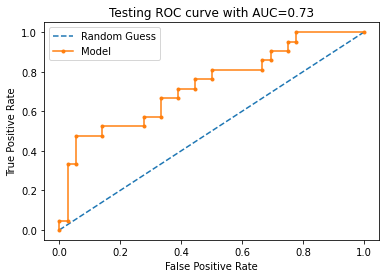

In [93]:
y_test_pred = result_stat_model_pulmonary.predict(X_test)
plot_logistics_no_model(X_train_SMOTE, y_train_SMOTE,X_test, y_test,y_test_pred,"Testing")

In [95]:
#Sensitivity, specifity
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, np.round(y_test_pred)).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
positive_predictive_value = tp / (tp+fp)
print(specificity)
print(sensitivity)
print(f'Positive Predictive Value {positive_predictive_value}')
accuracy_score(y_test, np.round(y_test_pred))

0.6111111111111112
0.6666666666666666
Positive Predictive Value 0.5


0.631578947368421

In [81]:
accuracy_score(y_test, np.round(y_test_pred))

0.6666666666666666

In [60]:
confusion_matrix(y_test, np.round(y_test_pred))

array([[23, 13],
       [ 6, 15]], dtype=int64)

0.8302645502645503


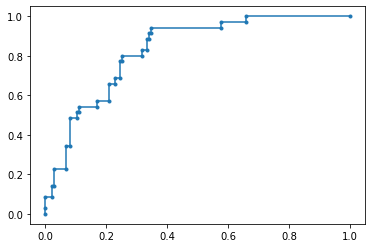

In [96]:
fpr, tpr, _ = roc_curve(y_train, result_stat_model_pulmonary.predict(X_train))
auc = roc_auc_score(y_train,  result_stat_model_pulmonary.predict(X_train), multi_class='ovr')
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='Logistic')
print(auc)

## Muscle skeletal deficiency

In [1064]:
muscle_skeletal_lim_df = data.copy()
muscle_skeletal_lim_df['sex'] = [0 if x == 'M' else 1 for x in pulmonary_lim_df['sex']]
X = muscle_skeletal_lim_df
X = X.drop('SessionId', axis=1)
X = X.drop('PatientId', axis=1)
X = X.drop('CardiacLim', axis=1)
X = X.drop('PulmonaryLim', axis=1)
X = X.drop('MuscleSkeletalLim', axis=1)
#X = X[['VEvsVCO2Slope','MeanO2Pulse','MaxO2Pulse','MinO2Pulse','MeanVO2','LowestVO2','MeanVE','MeanRR','VO2atVT','VO2vsPeakVO2atVT','75VO2Slope']]
#X = X[['MeanO2Pulse','MaxO2Pulse','MinO2Pulse','MeanVO2','LowestVO2','MeanVE','MeanRR','VO2atVT','VO2vsPeakVO2atVT','75VO2Slope','PeakRER', 'LowestRER']]
X = X[['MeanO2Pulse','MeanVO2','MeanVE','MeanRR','PeakRER', 'LowestRER']]


y = pulmonary_lim_df['MuscleSkeletalLim']

In [1065]:
#'PeakVO2Real', 'DiffPeakVO2', 'MeanRER', 'PeakRER', 'LowestRER',
#       'MeanVE', 'PeakVE', 'LowestVE', 'MeanRR', 'PeakRR', 'LowestRR',

In [1066]:
X_normalized = (X-X.mean())/X.std()

In [1067]:
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.25, random_state=42
)

In [1068]:
from imblearn.over_sampling import SMOTE
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

C:\Users\julio\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [1069]:
modelMuscleSkeletal = sm.GLM(y_train_SMOTE,X_train_SMOTE, sm.families.Binomial())
result_stat_model_muscle_skeletal = modelMuscleSkeletal.fit()
result_stat_model_muscle_skeletal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  298
Model:                            GLM   Df Residuals:                      293
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -139.35
Date:                Tue, 25 May 2021   Deviance:                       278.70
Time:                        13:39:57   Pearson chi2:                     292.
No. Iterations:                    40                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             8.5555      3.127      2.736      0.006       2.427      14.684
x2            -8.8439      3.120     -2.835      0.005     -14.959      -2.729
x3            -0.6057      0.256     -2.366      0.018      -1.107      -0.104
x4            -0.4650      0.188     -2.469      0.014      -0.834      -0.096
x5            -0.3419      0.086     -3.961      0.000      -0.511      -0.173
x6            -0.3419      0.086     -3.961      0.000      -0.511      -0.173
==============================================================================
"""

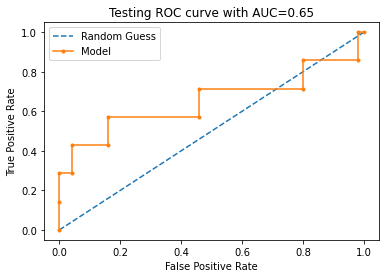

In [1070]:
y_test_pred = result_stat_model_muscle_skeletal.predict(X_test)
plot_logistics_no_model(X_train_SMOTE, y_train_SMOTE,X_test, y_test,y_test_pred,"Testing")

In [321]:
accuracy_score(y_test, np.round(y_test_pred))

0.5087719298245614

In [322]:
confusion_matrix(y_test, np.round(y_test_pred))

array([[24, 26],
       [ 2,  5]], dtype=int64)

0.9111537232342601


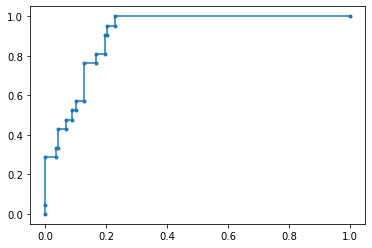

In [324]:
fpr, tpr, _ = roc_curve(y_train, result_stat_model_muscle_skeletal.predict(X_train))
auc = roc_auc_score(y_train,  result_stat_model_muscle_skeletal.predict(X_train), multi_class='ovr')
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='Logistic')
print(auc)

In [309]:
confusion_matrix(y_train, np.round(result_stat_model_pulmonary.predict(X_train)))

array([[85, 64],
       [ 0, 21]], dtype=int64)